### Load Packages

In [32]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance
from random import sample


### Load Data

In [2]:
cdc_survey = pd.read_csv('../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1]
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 863)


### Candidate Features

Here we list out all candidate features for our model. 

In [3]:
# Depression screener
dep_screener_cols = [
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks'
]

# Alcohol & smoking
alcohol_n_smoking_cols = [
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    'smoked_100_cigs',
    'currently_smoke'
]

#Medical Conditions 
med_condition_cols = [
    'chest_discomfort',
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    'has_diabetes',    
    #Blood Pressure & Cholesterol 
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    # general health
    'has_overweight_diagnosis',   
    'height_in',
    'weight_lbs', 
    'general_health_condition',      
]

# diet, nutrition, & exercise 
lifestyle_cols = [
    # exercise/weight loss
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',    
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    'attempt_weight_loss_1yr',           
    # diet
    'how_healthy_is_your_diet',    
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza'   
]

# Reproductive Health 
reproductive_health_cols = [
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc'
]

# socioeconomic status
socioeconomic_cols = [
    #Food Security
    'emergency_food_received',
    'food_stamps_used',
    #Hospital Utilization & Access to Care
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
    'duration_last_healthcare_visit',       
    #Health Insurance
    'have_health_insurance',
    'have_private_insurance',
    'plan_cover_prescriptions',   
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule'    
]

demographic_cols = [
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born',    
    'has_health_insurance',
    'has_health_insurance_gap'   
]

# combine all candidate features
candidate_features = dep_screener_cols + \
    alcohol_n_smoking_cols + \
    med_condition_cols + \
    lifestyle_cols + \
    socioeconomic_cols + \
    reproductive_health_cols + \
    demographic_cols


len(candidate_features)

116

### Function to create test & train dataset

In [4]:
def get_model_data(original_df, 
                   columns, 
                   test_size_to_use=0.2,
                   drop_null_rows=False,
                   null_imputer_strategy='median', # mean, median, most_frequent
                   use_value_scaler=True,
                   use_smote=False):
    """
    Function to build feature & indicator matrices for both train & test.
    """
    
    # add target column (MDD)
    cols_to_use = columns.copy()
    cols_to_use.insert(0, 'MDD')
    
    df_to_use = original_df[cols_to_use]
    
    if drop_null_rows:
        df_to_use.dropna(inplace=True)
    
    # Create test & train data
    x = df_to_use.iloc[:,1:].values
    y = df_to_use['MDD'].values
    
    if not drop_null_rows:
        # SimpleImputer() = fill in missing values
        # note imputer may drop columns if no values exist for it
        imputer = SimpleImputer(strategy=null_imputer_strategy)  
        x = imputer.fit_transform(x)

    # RobustScaler() = scale features to remove outliers
    if use_value_scaler:
        trans = RobustScaler()
        x = trans.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(
        x, 
        y, 
        test_size=test_size_to_use, 
        random_state=42
    ) 
    
    # Technique to de-risk from positive class imbalance
    if use_smote:
        sm = SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    
    return x_train, x_test, y_train, y_test

### Function to get performance across different models

In [5]:
def get_performance_df(label_actual, label_pred, model_name):
    """
    Function to calculate performance metrics for model.
    Includes precision, recal, F1, & support.
    """
    # create classification report
    result_table = classification_report(label_actual, label_pred, output_dict=True)
    result_table = pd.DataFrame.from_dict(result_table)

    # store for later
    accuracies = result_table['accuracy']

    # rename grouping
    result_table.columns = [
        'depressed_no',
        'depressed_yes',
        'accuracy',
        'macro_avg',
        'weighted_avg'
    ]

    # create dataframe with 1 row per grouping
    result_table.drop(labels = 'accuracy', axis = 1, inplace=True)
    result_table = result_table.transpose()
    result_table['accuracy'] = list(accuracies)
    result_table = result_table.reset_index()
    result_table.rename(columns = {'index':'grouping'},inplace=True)
    result_table['model'] = model_name
    result_table = result_table[['model','grouping','precision','recall','f1-score','support','accuracy']]
    return result_table

def generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test):
    """
    Function that trains and makes predictions using 5 of the classifiers went over during the class.
    Meant as a helper function for easier testing of different modeling pipelines.
    """

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    # test
    pred_labels_knn  = knn.predict(x_test)
    score_knn = get_performance_df(y_test, pred_labels_knn,'Knn')
    # train
    pred_labels_knn_train  = knn.predict(x_train)
    score_knn_train = get_performance_df(y_train, pred_labels_knn_train,'Knn')
    
    # Logistic Regression
    lm = LogisticRegression()
    lm.fit(x_train, y_train)
    # test 
    pred_labels_lr  = lm.predict(x_test)
    score_lr = get_performance_df(y_test, pred_labels_lr,'Logistic Regression')
    # train 
    pred_labels_lr_train  = lm.predict(x_train)
    score_lr_train = get_performance_df(y_train, pred_labels_lr_train,'Logistic Regression')    
        
    # Bernoulii Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    # test 
    pred_labels_bnb  = bnb.predict(x_test)
    score_bnb = get_performance_df(y_test, pred_labels_bnb,'Bernoulli Naive Bayes')    
    # train 
    pred_labels_bnb_train  = bnb.predict(x_train)
    score_bnb_train = get_performance_df(y_train, pred_labels_bnb_train,'Bernoulli Naive Bayes')       
        
    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    # test 
    pred_labels_gnb  = gnb.predict(x_test)
    score_gnb = get_performance_df(y_test, pred_labels_gnb,'Gaussian Naive Bayes')  
    # train 
    pred_labels_gnb_train  = gnb.predict(x_train)
    score_gnb_train = get_performance_df(y_train, pred_labels_gnb_train,'Gaussian Naive Bayes')         

    # Random Forest
    rf = RandomForestClassifier(random_state=0)
    rf.fit(x_train, y_train)
    # test     
    pred_labels_rf  = rf.predict(x_test)
    score_rf = get_performance_df(y_test, pred_labels_rf,'Random Forest')   
    # train 
    pred_labels_rf_train  = rf.predict(x_train)
    score_rf_train = get_performance_df(y_train, pred_labels_rf_train,'Random Forest')         
    
    #Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    # test
    pred_labels_dt = dt.predict(x_test)
    score_dt = get_performance_df(y_test, pred_labels_dt,'Decision Tree')
    # train 
    pred_labels_dt_train  = dt.predict(x_train)
    score_dt_train = get_performance_df(y_train, pred_labels_dt_train,'Decision Tree')          

    #Gradient Boosting Classifier
    gb = GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    # test 
    pred_labels_gb = gb.predict(x_test)
    score_gb = get_performance_df(y_test, pred_labels_gb,'Gradient Boosting Classifier')
    # train 
    pred_labels_gb_train  = gb.predict(x_train)
    score_gb_train = get_performance_df(y_train, pred_labels_gb_train,'Gradient Boosting Classifier')     
    
    # make dataframe with scores (on test data)
    scores = pd.concat(
        [score_knn, 
         score_lr, 
         score_bnb, 
         score_gnb, 
         score_rf, 
         score_dt, 
         score_gb]
    )
    scores = scores.sort_values(by = 'recall', ascending=False)
    
    # make dataframe with scores (on train data)
    scores_train = pd.concat(
        [score_knn_train, 
         score_lr_train, 
         score_bnb_train, 
         score_gnb_train, 
         score_rf_train, 
         score_dt_train, 
         score_gb_train]
    )
    scores_train = scores_train.sort_values(by = 'recall', ascending=False)    
        
    # make dataframe with predictions
    predictions = pd.DataFrame({
        'actuals':y_test,
        'pred_knn':pred_labels_knn,
        'pred_logistic_regression':pred_labels_lr,
        'pred_bernoulli_naive_bayes':pred_labels_bnb,
        'pred_gaussian_naive_bayes':pred_labels_gnb,
        'pred_random_forest':pred_labels_rf,
        'pred_decision_tree':pred_labels_dt,
        'pred_gradient_boosting_classifier':pred_labels_gb
    })

    return scores, predictions, scores_train

### Function for Error analysis

In [6]:
def plot_confusion_matrix(y_test, pred_labels):
    """
    Function that displays a confusion matrix for provided true and predicted classes
    """
    #print(f'cover type 1 and type 2 total correct {np.sum(np.diag(metrics.confusion_matrix(y_test, pred_labels))[:2])}')

    cm = confusion_matrix(y_test, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,5))
    disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')    
    plt.grid(False)
    plt.show()
    return

def label_pred(row):
    """
    Function that labels prediction cases into TP, TN, FP, FN
    """
    if row['y_actual'] == row['y_pred']:
        if row['y_actual'] == 1:
            result = 'TP'
        else:
            result = 'TN'
    else: 
        if row['y_actual'] == 1:
            result = 'FN'
        else:
            result = 'FP'

    return result

def create_error_plots(
    y_actuals,
    y_predictions,
    x_test_matrix,
    x_test_columns,
    columns_to_plot,
    show_bar_plot=True,
    show_density_plot=True):
    """
    Function that creates bi-variate plots comparing TP, TN, FP, FN for each desired feature column.
    """
    
    ### Create dataframe of predictions & feature 
    
    # create dataframe with actuals & predictions w/ labels
    prediction_labels = pd.DataFrame(columns = ['y_actual','y_pred'])
    prediction_labels['y_actual'] = y_actuals
    prediction_labels['y_pred'] = y_predictions
    prediction_labels['label'] = prediction_labels.apply(label_pred, axis = 1)

    # feature df 
    feature_df = pd.DataFrame(x_test_matrix, columns = x_test_columns)

    # combine into 1
    pred_data = pd.concat([prediction_labels, feature_df], axis = 1)

    ### Bi-variate plots
    for column in columns_to_plot:
    
        if show_density_plot:
            ## Density plot
            sns.kdeplot(
                data=pred_data, 
                x=column, 
                hue="label", 
                cut=0, 
                common_norm=False, 
                alpha=0.4
            )

        if show_bar_plot:
            ## barplot
            # create % of total column by group
            group_data = pred_data.groupby(['label',column])['y_actual'].count().reset_index()
            group_data['Pct of Total'] = group_data['y_actual'] / group_data.groupby('label')['y_actual'].transform('sum')

            sns.catplot(
                data=group_data, 
                kind="bar",
                x=column, 
                y="Pct of Total", 
                hue="label",
                alpha = 0.8
            )

        plt.show()
        
    return pred_data

In [9]:
def get_random_forest_n_top_features(train_data=x_train, 
                                     train_labels=y_train,
                                     feature_columns=dep_screener_cols):
    """
    A model that trains a random forest model and returns the feature importances as a dataframe.
    The index of the row corresponds to the column index in the initial array
    """
    
    # fit random forest and print accuracy
    rf = RandomForestClassifier(random_state=0)
    rf.fit(train_data, train_labels)
   
    # list feature importances
    # Get numerical feature importances
    importances = list(rf.feature_importances_)
    feature_importances = pd.DataFrame({'Feature': feature_columns,'Feature Importance (RF)': importances})
    feature_importances = feature_importances.sort_values('Feature Importance (RF)',ascending=False)
    
    return feature_importances

## Baseline Model

We start by building baseline models across the 6 classifiers. We start by using the 10 questions from the depression screener questionaire.

In [8]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model, predictions, performance_train = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

baseline_model_summary = baseline_model[baseline_model['grouping'] == 'macro_avg']
baseline_model_summary[['model','recall','f1-score','precision','accuracy','support']]

(6192, 10)
(1549, 10)
(6192,)
(1549,)


,model,recall,f1-score,precision,accuracy,support
2,Bernoulli Naive Bayes,0.675232,0.632390,0.614506,0.826985,1549.0
2,Gaussian Naive Bayes,0.660506,0.633699,0.618641,0.840542,1549.0
2,Decision Tree,0.560445,0.571137,0.596713,0.870884,1549.0
2,Random Forest,0.543840,0.555191,0.688099,0.896062,1549.0
2,Logistic Regression,0.538270,0.546401,0.685605,0.896062,1549.0
2,Knn,0.534046,0.539683,0.655004,0.893480,1549.0
2,Gradient Boosting Classifier,0.519854,0.513698,0.719752,0.897999,1549.0


Naive Bayes are the best

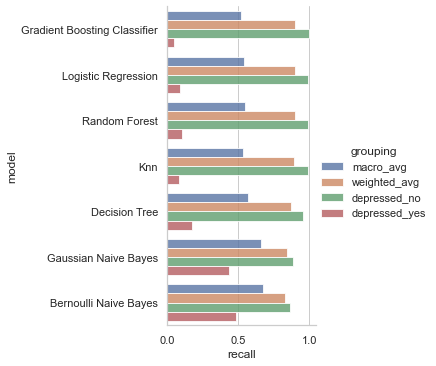

In [15]:
sns.catplot(
    data=baseline_model, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

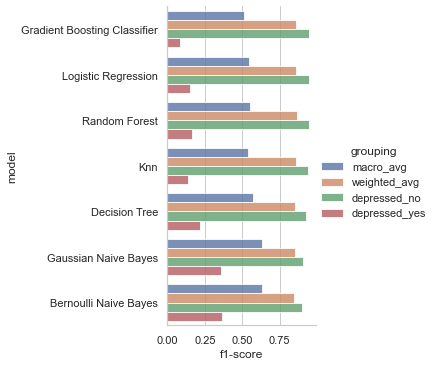

In [175]:
sns.catplot(
    data=baseline_model, 
    kind="bar",
    x='f1-score', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

We see low recall among the depressed_yes group (positive class). This will be the emphasis on future model enhancements.

## Error Analysis

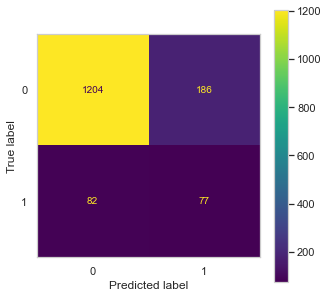

In [233]:
plot_confusion_matrix(
    y_test = predictions['actuals'], 
    pred_labels = predictions['pred_bernoulli_naive_bayes']
)

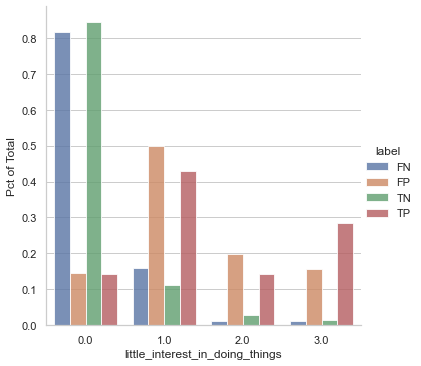

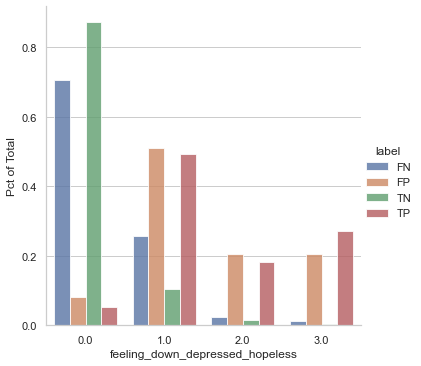

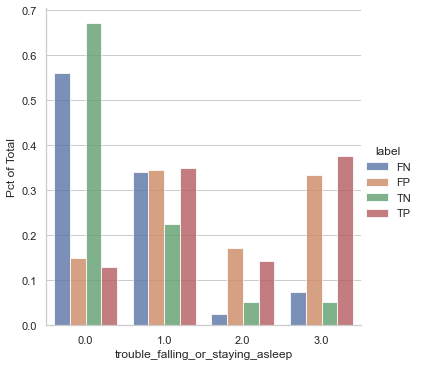

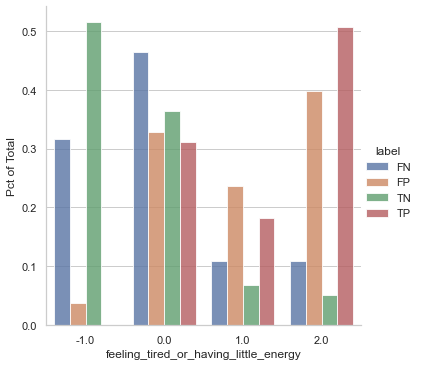

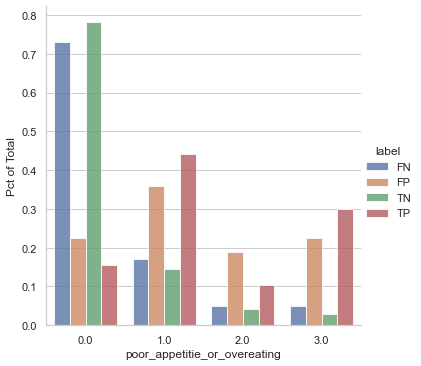

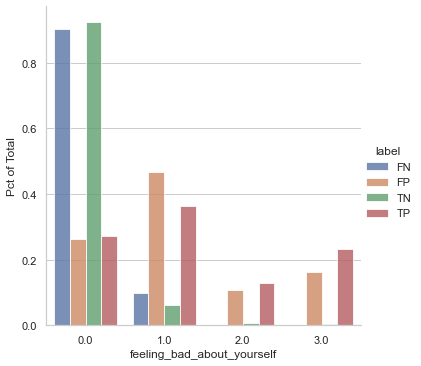

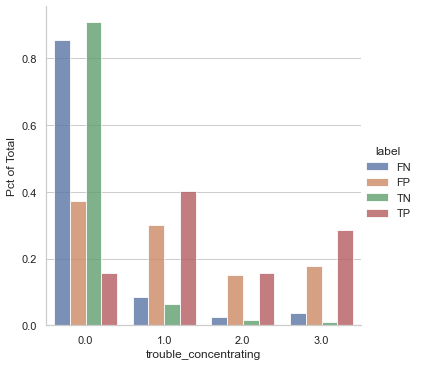

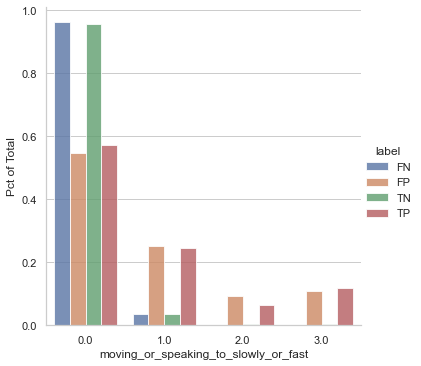

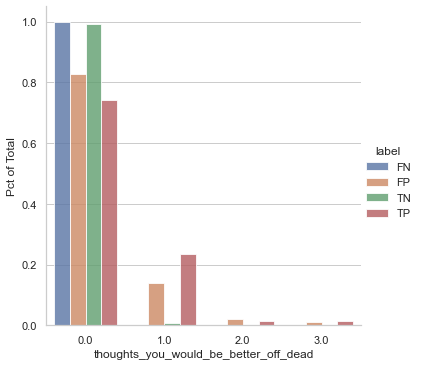

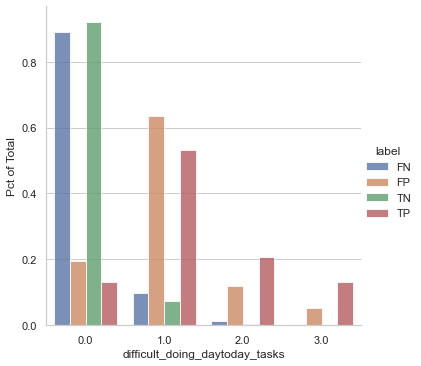

In [177]:
pred_data = create_error_plots(
    y_actuals = predictions['actuals'],
    y_predictions = predictions['pred_bernoulli_naive_bayes'],
    x_test_matrix = x_test,
    x_test_columns = dep_screener_cols,
    columns_to_plot = dep_screener_cols,
    show_density_plot=False
)

#### Feature distribution across labels

Find the next several best features to add based on ones where initially strong features have a false read. I.E individual is depressed but imporant column has low value.

In [251]:
# stats by prediction label & combine feature importance

# aggregate features by label
pred_data_summary = pred_data.groupby(['label']).mean().round(2).reset_index()

# order columns 
pred_data_summary['label'] = pd.Categorical(
    pred_data_summary['label'], 
    categories=["TP","FP","TN","FN"],
    ordered=True
)
pred_data_summary.sort_values('label', inplace=True)

# transpose so each row is a feature
pred_data_summary = pred_data_summary.T.reset_index()

# merge importances
rf_feature_importances = get_random_forest_n_top_features()
pred_data_summary = pred_data_summary.merge(rf_feature_importances, left_on='index', right_on='Feature', how = 'left')

# drop duplicate column
pred_data_summary.drop(columns='Feature', inplace=True)

## remove unneeded rows
pred_data_summary = pred_data_summary[~pred_data_summary['index'].isin(['y_actual','y_pred'])]

# order by feature importance
pred_data_summary = pred_data_summary.sort_values(by='Feature Importance (RF)',ascending=False)
pred_data_summary = pred_data_summary.rename(columns={"index": "Feature", 
                                  3: "TP",
                                  1:"FP",
                                  2:"TN",
                                  0:"FN"})

pred_data_summary

,Feature,TP,FP,TN,FN,Feature Importance (RF)
4,feeling_down_depressed_hopeless,1.68,1.53,0.15,0.34,0.116370
7,poor_appetitie_or_overeating,1.55,1.41,0.32,0.41,0.116036
5,trouble_falling_or_staying_asleep,1.77,1.69,0.48,0.61,0.113776
9,trouble_concentrating,1.57,1.13,0.13,0.24,0.107036
12,difficult_doing_daytoday_tasks,1.34,1.03,0.08,0.12,0.105663
3,little_interest_in_doing_things,1.57,1.37,0.21,0.22,0.105246
6,feeling_tired_or_having_little_energy,1.19,0.99,-0.34,0.01,0.104398
8,feeling_bad_about_yourself,1.32,1.17,0.09,0.1,0.099671
10,moving_or_speaking_to_slowly_or_fast,0.73,0.76,0.06,0.04,0.088079
11,thoughts_you_would_be_better_off_dead,0.3,0.22,0.01,0.0,0.043725


## Find candidate columns to add based on error analysis

look at high correlation cols not in existing baseline model

In [11]:
cor_columns = candidate_features.copy()
cor_columns.append('MDD')

# find columns where top feature is 0
#df_to_use = cdc_survey_pmom[cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0]
df_to_use = cdc_survey_pmom[(cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0) & 
                (cdc_survey_pmom['poor_appetitie_or_overeating'] == 0) &
                (cdc_survey_pmom['trouble_falling_or_staying_asleep'] == 0)]

correlation_matrix = df_to_use[cor_columns].corr(method='pearson')
correlation_values_abs = abs(correlation_matrix['MDD']).sort_values(ascending=False)
correlation_values_abs = correlation_values_abs[correlation_values_abs.notna()]

In [12]:
top_additional_candidates = list(correlation_values_abs[1:20].index)
top_additional_candidates = [col for col in top_additional_candidates if col not in dep_screener_cols]
top_additional_candidates

['seen_mental_health_professional',
 'times_with_12plus_alc',
 'duration_last_healthcare_visit',
 'time_since_last_healthcare',
 'horomones_not_bc',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'respiratory_issues',
 'arthritis',
 'age_in_years',
 'is_usa_born',
 'regular_periods',
 'high_bp',
 'metal_objects',
 'count_minutes_moderate_sedentary_activity',
 'cholesterol_prescription',
 'chest_discomfort',
 'emergency_food_received']

## Find candidate columns per each theme

look at high correlation cols not in existing baseline model

## Retest Model

### Attempt 1

add new candidate cols correlation when dep screener is 0

In [19]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + top_additional_candidates
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model, predictions, performance_train = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

baseline_model_summary = baseline_model[baseline_model['grouping'] == 'macro_avg']
baseline_model_summary[['model','recall','f1-score','precision','accuracy']]

(6192, 28)
(1549, 28)
(6192,)
(1549,)


,model,recall,f1-score,precision,accuracy
2,Gaussian Naive Bayes,0.715556,0.635737,0.616888,0.804390
2,Bernoulli Naive Bayes,0.678110,0.637555,0.619296,0.832150
2,Decision Tree,0.579929,0.582395,0.585195,0.850872
2,Logistic Regression,0.569624,0.592099,0.705304,0.897353
2,Gradient Boosting Classifier,0.564773,0.586185,0.716181,0.898644
2,Random Forest,0.548783,0.563306,0.736592,0.899935
2,Knn,0.543480,0.554582,0.681346,0.895416


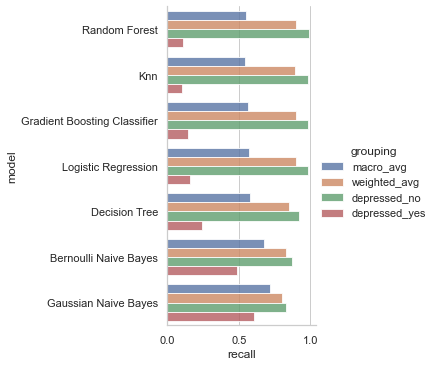

In [20]:
sns.catplot(
    data=baseline_model, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

### Attempt 2

Add in bin of num dep

In [14]:
cdc_survey_pmom['num_dep_screener_3'] = (cdc_survey_pmom[dep_screener_cols]>=3).sum(axis=1)
cdc_survey_pmom['num_dep_screener_3_bin'] = pd.cut(
    cdc_survey_pmom['num_dep_screener_3'], 
    bins=[-np.inf, 0, 1, 3, np.inf], 
    labels=[0, 1, 2 ,3]
)

In [153]:
cdc_survey_pmom.groupby('num_dep_screener_3')['MDD'].mean()

num_dep_screener_3
0     0.065739
1     0.119420
2     0.248744
3     0.251337
4     0.305785
5     0.380282
6     0.400000
7     0.484848
8     0.250000
9     0.444444
10    0.500000
Name: MDD, dtype: float64

In [157]:
cdc_survey_pmom.groupby('num_dep_screener_3_bin')['MDD'].mean()

num_dep_screener_3_bin
0    0.065739
1    0.119420
2    0.249573
3    0.360269
Name: MDD, dtype: float64

In [158]:
cdc_survey_pmom.groupby('num_dep_screener_3_bin')['num_dep_screener_3'].max()

num_dep_screener_3_bin
0     0
1     1
2     3
3    10
Name: num_dep_screener_3, dtype: int64

In [51]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + top_additional_candidates + ['num_dep_screener_3_bin']
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model, predictions, performance_train = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

baseline_model_summary = baseline_model[baseline_model['grouping'] == 'macro_avg']
baseline_model_summary[['model','recall','f1-score','precision','accuracy']]

(6192, 29)
(1549, 29)
(6192,)
(1549,)


,model,recall,f1-score,precision,accuracy
2,Gaussian Naive Bayes,0.719420,0.638753,0.619241,0.806327
2,Bernoulli Naive Bayes,0.679003,0.632114,0.613897,0.823757
2,Logistic Regression,0.572408,0.595686,0.705578,0.897353
2,Decision Tree,0.570402,0.571187,0.572011,0.843770
2,Gradient Boosting Classifier,0.554260,0.570370,0.681093,0.894771
2,Random Forest,0.551568,0.567581,0.734777,0.899935
2,Knn,0.543840,0.555191,0.688099,0.896062


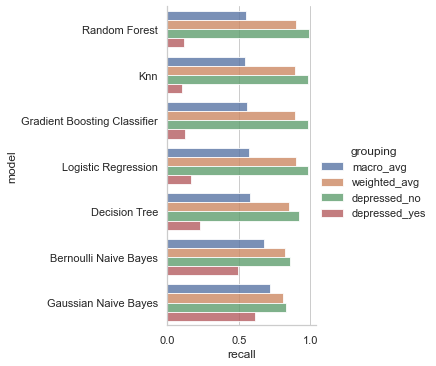

In [163]:
sns.catplot(
    data=baseline_model, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

### Attempt 3

Try adding in top by theme  

## Train & Test dataset score based on # of observations

Change one of;
- num of observations from entire dataset
- test/train split proportion

## Keep all observations

In [33]:
def create_alt_plot(dataset, x_col, x_name, y_col, y_name, title):
    chart = alt.Chart(dataset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
    ).encode(
        x = alt.X(x_col, title=x_name),
        y = alt.Y(y_col, title=y_name),
        color='model:N',
    ).facet(
        facet=alt.Facet('dataset', sort=['train_set', 'test_set']),
        title=title
    )


    chart.configure_title(
        fontSize=20,
        font='Courier',
        color='gray',
        align='center'
    )
    
    return chart

In [233]:
performance_all = pd.DataFrame(
    columns = ['model', 'grouping', 'precision', 'recall', 'f1-score',
       'support', 'accuracy', 'dataset','train_n','test_n']
)

n_test_options = list(range(100,cdc_survey_pmom.shape[0], 500))

for n_test in n_test_options:
    
    # build models with that N
    x_train, x_test, y_train, y_test = get_model_data(
        #original_df = data_to_use,
        original_df = cdc_survey_pmom,
        columns = dep_screener_cols + top_additional_candidates + ['num_dep_screener_3_bin'],
        test_size_to_use = n_test
    )

    baseline_model, predictions, performance_train = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )
    
    # merge test & train data performance
    baseline_model['dataset'] = 'test_set'
    performance_train['dataset'] = 'train_set'   
    performance_detail = pd.concat([baseline_model,performance_train])
    #performance_detail['n_obs'] = n_obs
    performance_detail['train_n'] = len(y_train)
    performance_detail['test_n'] = len(y_test)
    
    performance_all = pd.concat([performance_all,performance_detail])

In [234]:
[cdc_survey_pmom.shape[0] - test_size for test_size in list(range(100,cdc_survey_pmom.shape[0], 500))]

[7641,
 7141,
 6641,
 6141,
 5641,
 5141,
 4641,
 4141,
 3641,
 3141,
 2641,
 2141,
 1641,
 1141,
 641,
 141]

In [235]:
set(performance_all['train_n'])

{141,
 641,
 1141,
 1641,
 2141,
 2641,
 3141,
 3641,
 4141,
 4641,
 5141,
 5641,
 6141,
 6641,
 7141,
 7641}

In [236]:
set(performance_all['train_n'] + performance_all['test_n'])

{7741}

In [237]:
chart = create_alt_plot(
    dataset = performance_all[performance_all['grouping'] == "macro_avg"],
    x_col = 'train_n',
    x_name = '# of Observations in Training Dataset',
    y_col = 'f1-score',
    y_name = 'F1-Score',
    title = 'Model Performance By Train Size'
)

chart

alt.FacetChart(...)

In [219]:
chart = create_alt_plot(
    dataset = performance_all[performance_all['grouping'] == "macro_avg"],
    x_col = 'train_n',
    x_name = '# of Observations in Training Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Train Size'
)

chart

alt.FacetChart(...)

In [221]:
dataset_to_plot = performance_all[(performance_all['grouping'] == "depressed_yes") & 
                (performance_all['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'train_n',
    x_name = '# of Observations in Training Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Train Size (Depressed Individuals aka Target=1)'
)

chart

alt.FacetChart(...)

## Select only subset of observations

In [43]:
performance_all = pd.DataFrame(
    columns = ['model', 'grouping', 'precision', 'recall', 'f1-score',
       'support', 'accuracy', 'dataset','n_obs','train_n','test_n']
)


# list of # of observations to use in initial dataset
num_obs = list(range(200,cdc_survey_pmom.shape[0], 500)) + [cdc_survey_pmom.shape[0]]

for n_obs in num_obs:
    
    print(f"Doing {n_obs}...")
    
    # randomly sample 10 times per N amount (to reduce variance
    for i in range(20):
        
        # randomly subset to N observations
        seqn = sample(list(cdc_survey_pmom['SEQN']),n_obs)
        data_to_use = cdc_survey_pmom[cdc_survey_pmom['SEQN'].isin(seqn)]

        # build models with that N
        x_train, x_test, y_train, y_test = get_model_data(
            original_df = data_to_use,
            columns = dep_screener_cols + top_additional_candidates + ['num_dep_screener_3_bin'],
        )

        baseline_model, predictions, performance_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )

        # merge test & train data performance
        baseline_model['dataset'] = 'test_set'
        performance_train['dataset'] = 'train_set'   
        performance_detail = pd.concat([baseline_model,performance_train])
        performance_detail['n_obs'] = n_obs
        performance_detail['train_n'] = len(y_train)
        performance_detail['test_n'] = len(y_test)

        performance_all = pd.concat([performance_all,performance_detail])

Doing 200...
Doing 700...
Doing 1200...
Doing 1700...
Doing 2200...
Doing 2700...
Doing 3200...
Doing 3700...
Doing 4200...
Doing 4700...
Doing 5200...
Doing 5700...
Doing 6200...
Doing 6700...
Doing 7200...
Doing 7700...
Doing 7741...


In [56]:
# take avg across each train/test #

performance_all_avg = performance_all.groupby(['model','grouping','dataset','train_n','test_n','n_obs']).mean().reset_index()

In [45]:
num_obs

[200,
 700,
 1200,
 1700,
 2200,
 2700,
 3200,
 3700,
 4200,
 4700,
 5200,
 5700,
 6200,
 6700,
 7200,
 7700,
 7741]

In [46]:
set(performance_all['train_n'] + performance_all['test_n'])

{200,
 700,
 1200,
 1700,
 2200,
 2700,
 3200,
 3700,
 4200,
 4700,
 5200,
 5700,
 6200,
 6700,
 7200,
 7700,
 7741}

In [57]:
chart = create_alt_plot(
    dataset = performance_all_avg[performance_all_avg['grouping'] == "macro_avg"],
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-Score',
    title = 'Model Performance By Size of Dataset'
)

chart

alt.FacetChart(...)

In [58]:
chart = create_alt_plot(
    dataset = performance_all_avg[performance_all_avg['grouping'] == "macro_avg"],
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset'
)

chart

alt.FacetChart(...)

In [65]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_yes") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-score',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

chart

alt.FacetChart(...)

In [62]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_yes") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

chart

alt.FacetChart(...)

In [67]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_yes") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'precision',
    y_name = 'Precision',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

chart

alt.FacetChart(...)

In [66]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_no") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-score',
    title = 'Model Performance By Size of Dataset (Non-Depressed Individuals aka Target=0)'
)

chart

alt.FacetChart(...)

In [64]:
dataset_to_plot = performance_all_avg[(performance_all_avg['grouping'] == "depressed_no") & 
                (performance_all_avg['support'] >= 20)]

chart = create_alt_plot(
    dataset = dataset_to_plot,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset (Non-Depressed Individuals aka Target=0)'
)

chart

alt.FacetChart(...)

## Misc: Perm Importance

extract feature importance from any model

In [121]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = candidate_features
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model, predictions = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

(6192, 116)
(1549, 116)
(6192,)
(1549,)


In [230]:
# Gaussian Naive Bayes
gnb = BernoulliNB()
gnb.fit(x_train, y_train)
perm_importance = permutation_importance(gnb, x_test, y_test, n_repeats=10,random_state=0)

In [231]:
pd.DataFrame(gnb.predict_proba(x_test))

,0,1
0,0.601446,0.398554
1,0.923340,0.076660
2,0.995725,0.004275
3,0.524634,0.475366
4,0.993965,0.006035
...,...,...
1544,0.998341,0.001659
1545,0.983047,0.016953
1546,0.865164,0.134836
1547,0.866021,0.133979


In [127]:
gnb_importances = pd.DataFrame({
    'feature':candidate_features,
    'importance_mean':perm_importance['importances_mean'],
    'importance_std':perm_importance['importances_std']
}).sort_values(by='importance_mean',ascending=False)
gnb_importances

,feature,importance_mean,importance_std
5,feeling_bad_about_yourself,0.007941,0.001043
9,difficult_doing_daytoday_tasks,0.005423,0.002164
8,thoughts_you_would_be_better_off_dead,0.004713,0.001894
55,heart_attack,0.003357,0.001798
71,metal_objects,0.003163,0.001171
...,...,...,...
40,time_since_last_healthcare,-0.002905,0.002728
80,duration_last_healthcare_visit,-0.002905,0.002728
59,abdominal_pain,-0.003228,0.001555
43,have_health_insurance,-0.003809,0.001273
